# Title: **MARKETING CAMPAIGN FOR BANKING PRODUCTS**

## **Objective**:
__The classification goal is to predict the likelihood of a liability customer buying personal
loans.__


### **STEP 1:**  Importing the datasets and libraries, checking datatype, statistical summary, shape, null values.

In [19]:
#importing the required libraries.
import numpy as n
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#uploading the data set to colab notebook.
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (1).csv


In [21]:
import io
mydata=pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

__INITIAL INSPECTION :-__

In [22]:
#displaying first 10 rows.
mydata.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [23]:
#displaying last 10 rows.
mydata.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


**Observation:**
*   The data seems to been uploaded properly as the ID numbers start from 1 and end at 5000.

In [24]:
#to print columnwise data description and number of non null rows.
print("Column wise data type description and Null Values\n")
mydata.info()

Column wise data type description and Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [25]:
#to print the number of rows and columns.
print("Number of columns:", mydata.shape[1])
print("Number of rows:", mydata.shape[0])

Number of columns: 14
Number of rows: 5000


In [26]:
#to display the summary stats of the dataset.
mydata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [27]:
#to display how many null values are present in each line
mydata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Observations:**



*   There are 14 columns, all are numeric.
*   There are no null values present in the dataset.
* 'Personal Loan' is our target variable for this problem statement.
* Experience row contains a negative value so we have to either drop it or convert all the negative values into some processable value.

### **STEP 2:** Checking if we need to clean the data for any of the variables.

In [28]:
#since most times age and experience are correlated, we are just checking it out.
correlation= mydata['Age'].corr(mydata['Experience'])
correlation

0.9942148569683321

Observation:

* They seem to be perfectly correlated and seem to be a same column basically.

In [29]:
#since ID is of no use while analysis, we drop it
#since experience is highly correlated with age, we drop it.
mydata = mydata.drop(['ID','Experience'],axis=1 )
mydata.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


**Observation:**

* Now the data doesn't seem to have any noice.

### **STEP 3:** EDA: Studying the data distribution in each attribute and target variable, sharing the findings.

**3.1: Number of unique observations in each column**

In [30]:
mydata.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**Observation:**

*   Since ZIP code has too many unique values and also it won't highly affect the target varaible, we will drop it.


In [31]:
#dropping ZIP code
mydata=mydata.drop(['ZIP Code'],axis=1)

In [ ]:
#checking if ZIP code has been dropped successfully
mydata.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


**3.2: Number of people with zero mortage**


In [32]:
a = len(mydata[mydata.Mortgage==0])
print('Number of People with Zero Mortrage =',a);

Number of People with Zero Mortrage = 3462


**3.3: Number of people with zero credit car spending**

In [33]:
b = len(mydata[mydata.CCAvg==0])
print('Number of People with Zero Credit card average =',b);

Number of People with Zero Credit card average = 106


**3.4: Value counts of all categorical values**

In [34]:
mydata.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [35]:
mydata['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [36]:
mydata['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [37]:
mydata.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [38]:
mydata.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**3.5: Univariate and Bi variate analysis**

* 3.5.1: **Univariate analysis**


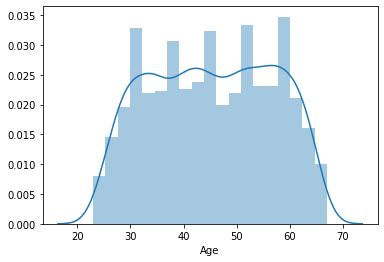

In [39]:
sb.distplot(mydata.Age);

**Observation:**


*   Age seems to have a symmetrical distribution

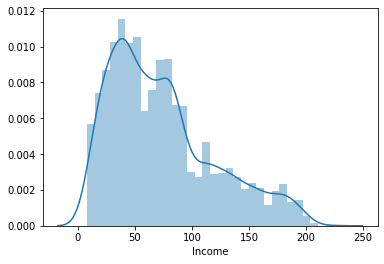

In [40]:
sb.distplot(mydata.Income);

**Observation:**


*   Income seems to be right skewed.

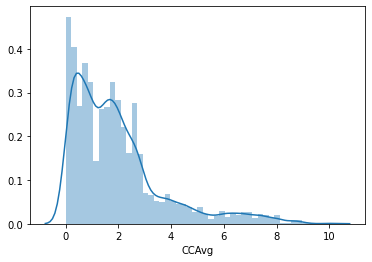

In [41]:
sb.distplot(mydata.CCAvg);

**Observation:**


*   Credit card average also seems to be right skewed.

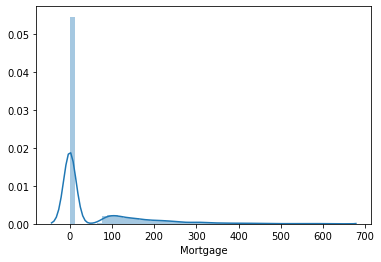

In [42]:
sb.distplot(mydata.Mortgage);

**Observation:**


*   Motgage seems to be highly right skewed.

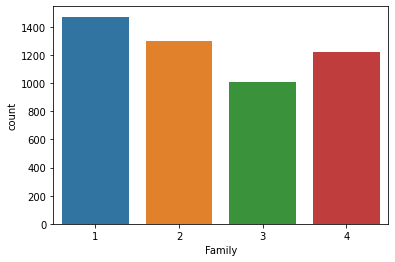

In [43]:
sb.countplot(mydata.Family);

Observation:

*   Highest number of familes have family size of 1.
*   The family size 3 is among the lowest number of families.



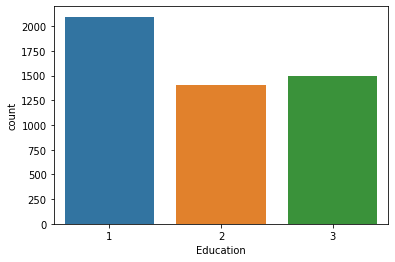

In [44]:
sb.countplot(mydata.Education);

**Observation:**


*   The highest number of familes have education upto only level 1 i.e, Undergrad.
* The number of familes with only upto graduate are of least number i.e, level 3. 




.

In [45]:
# Separating Continous Variables from Categorical
num_cat_var = mydata[['Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard','Family','Education']]
num_cont_var = mydata[['Age','Income','CCAvg','Mortgage']]

Age            AxesSubplot(0.125,0.536818;0.227941x0.343182)
Income      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
CCAvg       AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Mortgage          AxesSubplot(0.125,0.125;0.227941x0.343182)
dtype: object

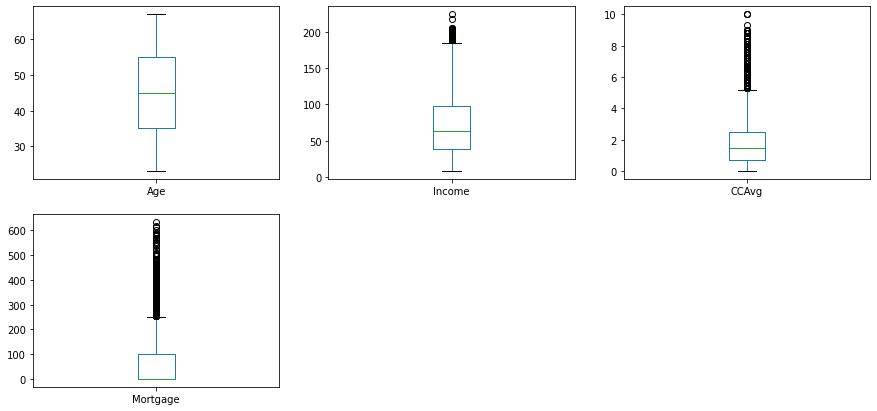

In [ ]:
# Univariate Analysis of Continous Variables
num_cont_var.plot.box(subplots =True, layout = (2,3), figsize = (15,7))

Observation:

* Income, CCAvg and Mortgage have outliers.
* Mortgage is unsymetrically distributed. Most customers have zero mortgage.

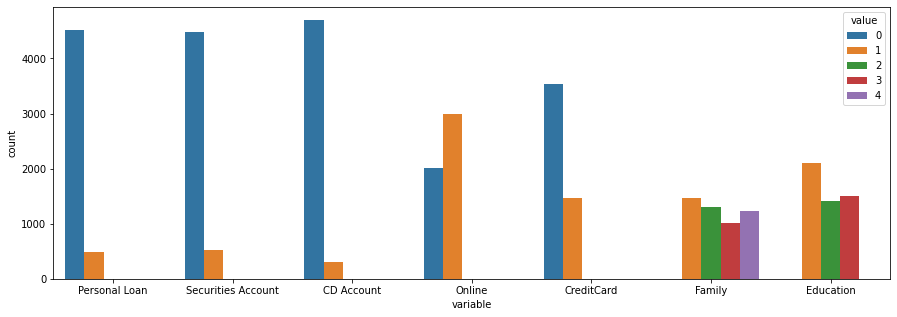

In [46]:
# Univariate Analysis of Categorical Variables
from matplotlib.pyplot import figure
df = pd.melt(num_cat_var)
figure(figsize=(15,5))
sb.countplot(data=df, x='variable', hue='value');

**Observations:**
* The target variable 'Personal Loan' is an unbalanced column with majority customers having not opted for Personal Loan in the previous campaign.
* Most customers do not have a CD Account or Securities Account.
* Larger number of customers use Online banking service.
* Majority customers in the dataset do not own a credit card.
* Large portion of the customers have an Education qualification upto an Undergraduation Degree.

* 3.5.2: **Bivariate analysis**

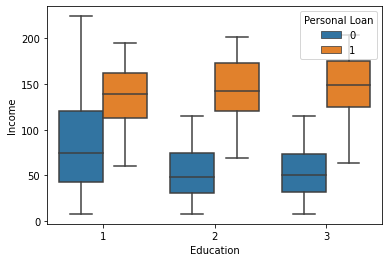

In [47]:
sb.boxplot(x='Education',y='Income',hue='Personal Loan',data=mydata)

**Observation:**
* Itseems the customers with more income are granted loan across each level.

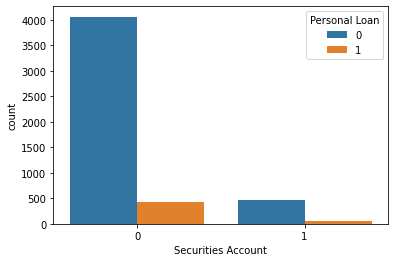

In [48]:
sb.countplot(x="Securities Account", data=mydata,hue="Personal Loan")

**Observation:**
* Itseems the customers having security account don't have personal loan.

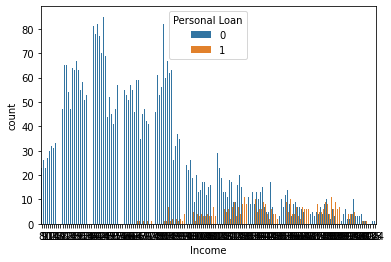

In [49]:
sb.countplot(x="Income", data=mydata,hue="Personal Loan")

**Observation:**
* Itseems the customers with more income have taken the loan.

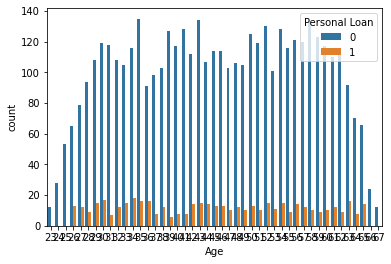

In [50]:
sb.countplot(x="Age", data=mydata,hue="Personal Loan")

**Observation:**
* Itseems the people under the age of 20 have availed the loan.

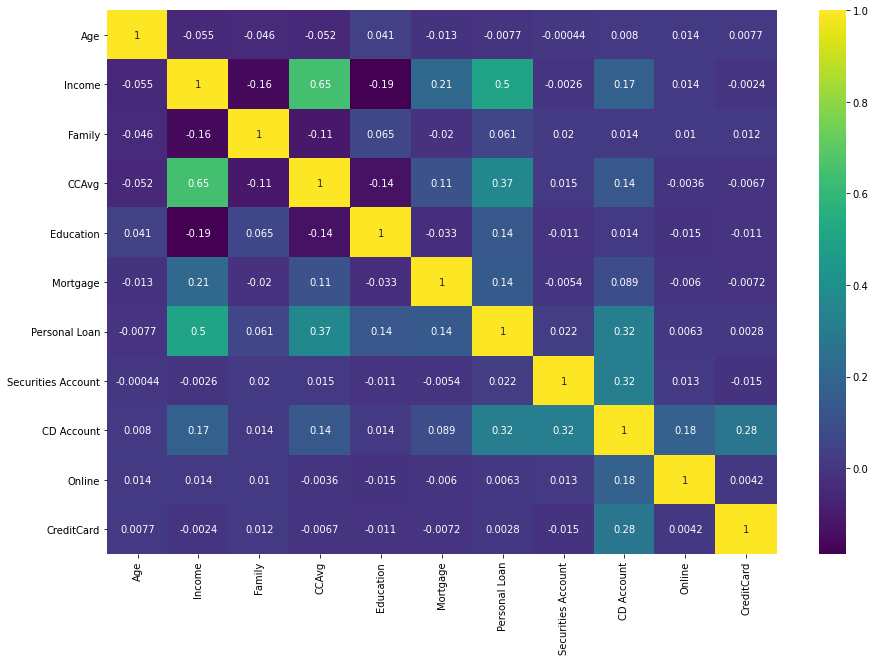

In [51]:
fig,ax=plt.subplots(figsize=(15,10))
sb.heatmap(mydata.corr(),cmap='viridis',annot=True);

**Observation:**
* Observing the above figure, we can say that there is no proper correlation between the variables except credit card average and income. 

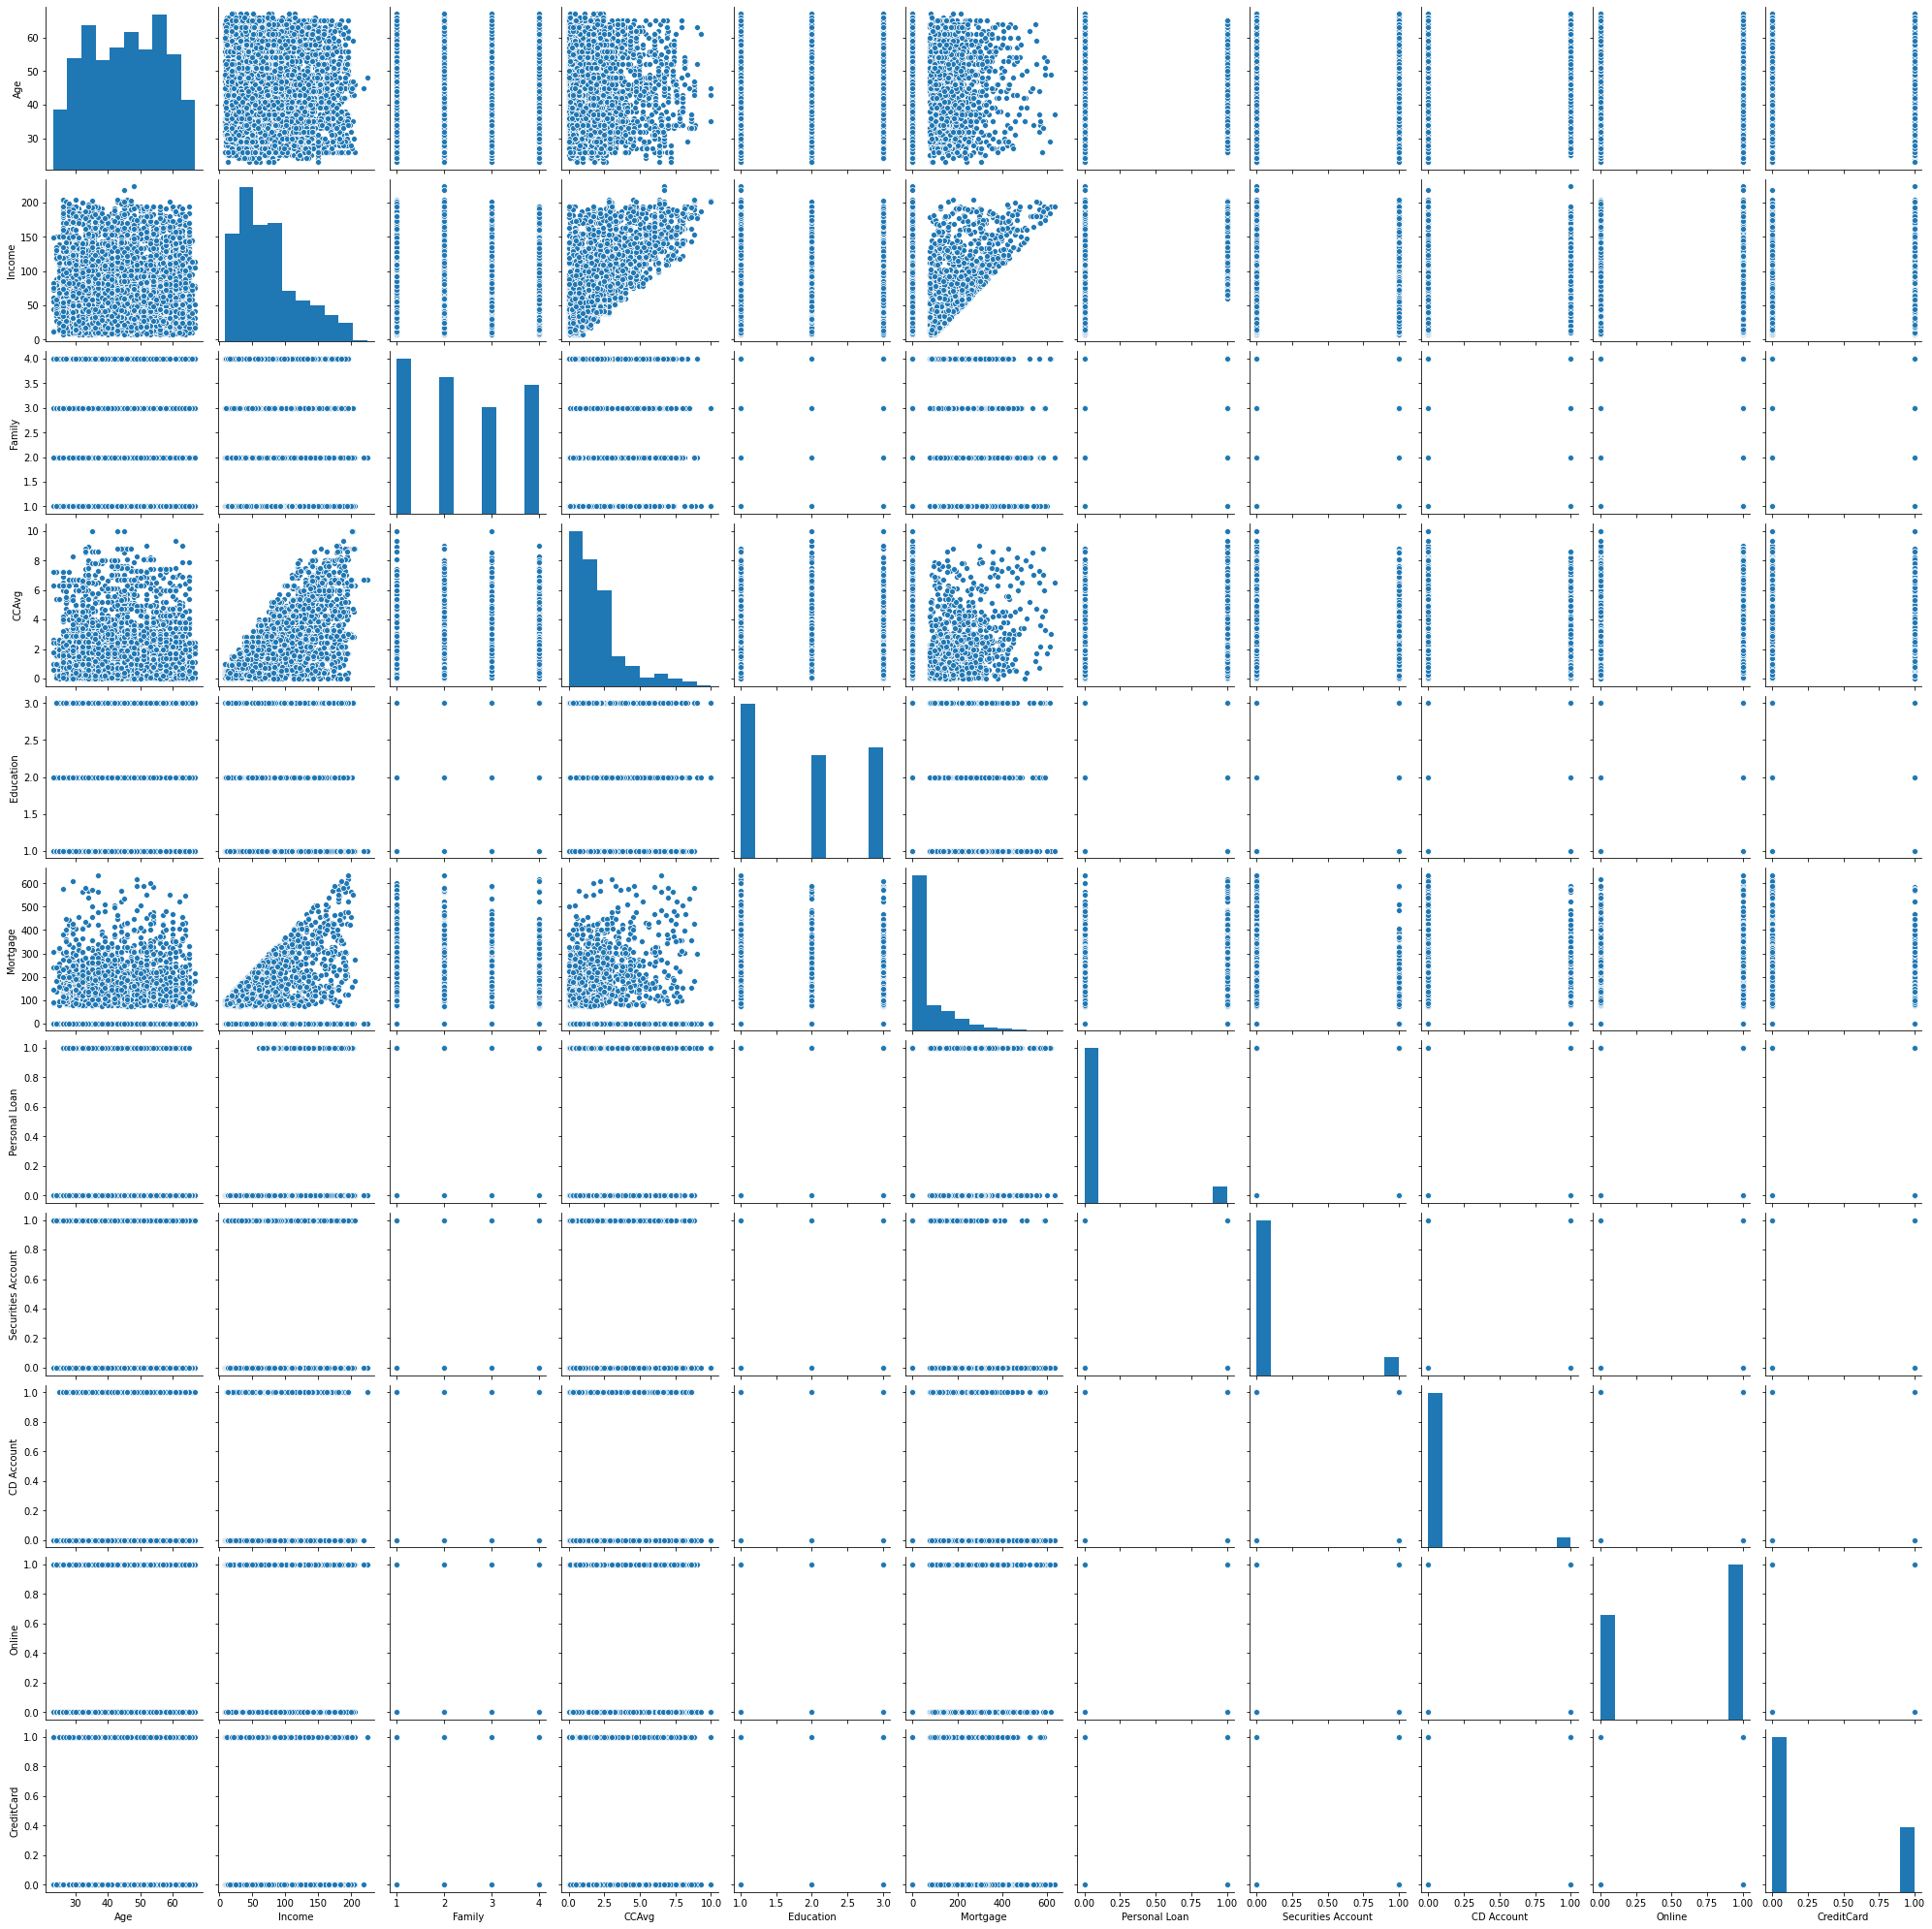

In [52]:
#just plotting all variables with each other
sb.pairplot(mydata)

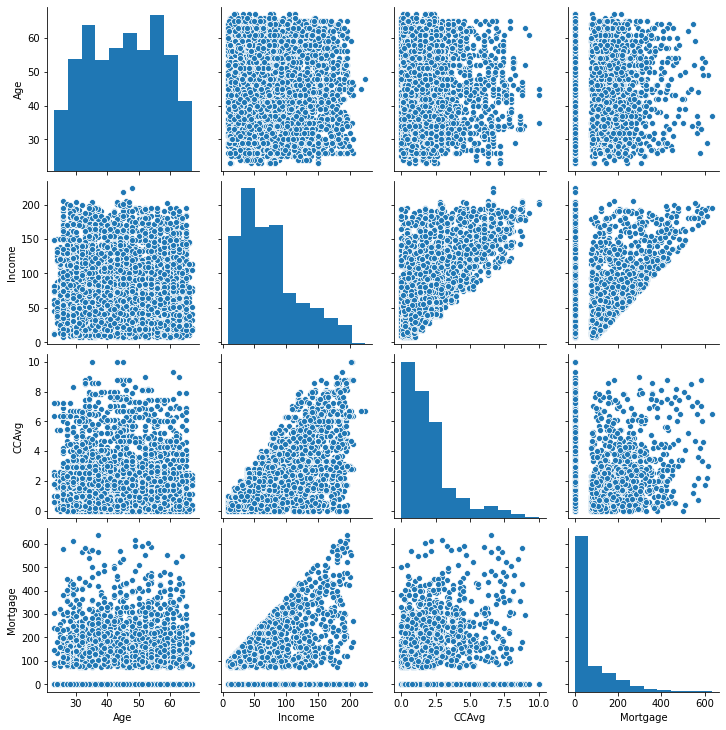

In [57]:
#only plotting of continous variables with each other 
sb.pairplot(num_cont_var);

**Observations:**
* Income & CCAvg are positively correlated.
* For low Income, CCAvg is low with small variability. However, as Income increases, the CCAvg spend increases with higher variablility.
* Higher income customers have higher value of mortgage.

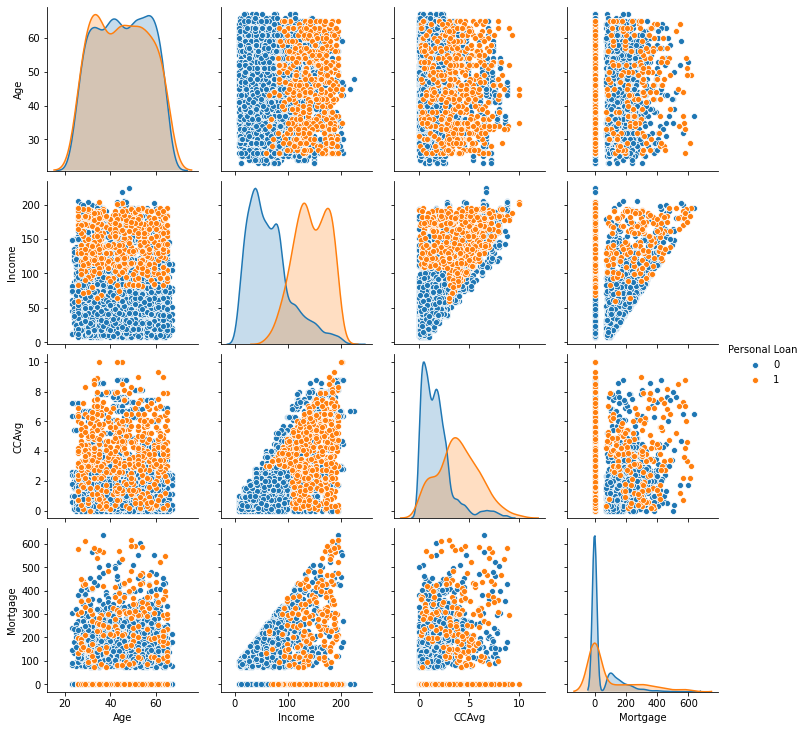

In [54]:
#target variable distribution wrt numerical features
sb.pairplot(data = mydata[['Age','Income','CCAvg','Mortgage','Personal Loan']], hue = 'Personal Loan');

**Observations:**
* Customers that take a loan usually have higher Income.
* On visual inspection of scatterplots, there seems to be a lot of overlap among the points and thus may not be classified well by techniques used for linearly separable data.

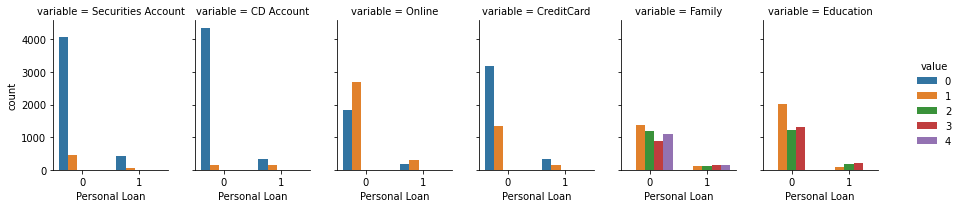

In [56]:
#target variable distribution wrt categorical features
df = pd.melt(num_cat_var,id_vars=['Personal Loan'])
sb.catplot(kind ='count', x='Personal Loan', data = df, hue = 'value', col='variable',
            aspect = 0.7 , height = 3,legend=True,margin_titles=True);

**Observation:**
* No significant relation between categorical variables and Target.

### **STEP 4:** Applying necessary transformations for the feature variables.

In [76]:
datax=mydata.loc[:, mydata.columns != "Personal Loan"]
datay=mydata["Personal Loan"]

In [77]:
datax.shape,datay.shape

((5000, 10), (5000,))

In [78]:
datax.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


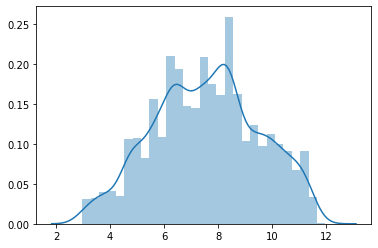

In [79]:
#applying transformation to income varaible
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(datax["Income"].values.reshape(-1,1))
t = pt.transform(datax["Income"].values.reshape(-1,1))
sb.distplot(t)

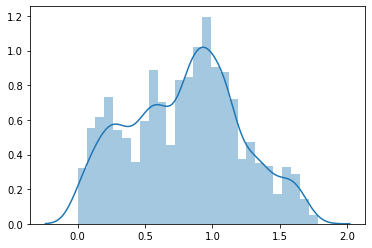

In [80]:
#applying transformation to credit card variable
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(datax["CCAvg"].values.reshape(-1,1))
t = pt.transform(datax["CCAvg"].values.reshape(-1,1))
sb.distplot(t)

In [81]:
#applyig binning method to mortgage variable
datax['Mortgage_int'] = pd.cut(datax.Mortgage,
                               bins=[0,100,200,300,400,500,600,700],
                               labels=[0,1,2,3,4,5,6],
                               include_lowest=True)
datax.drop('Mortgage', axis=1, inplace=True)

In [82]:
datax.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_int
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0


### **STEP 5:**  Normalising the data and split the data into training and test set in the ratio of 70:30 respectively.

In [93]:
#splitting data using stratified sampling
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size =0.3, stratify = datay, random_state=0)

 ### **STEP 6:**  Using the Logistic Regression model to predict the likelihood of a customer buying personal loans.

In [108]:
#Fitting the model
logistic_model = LogisticRegression(solver="liblinear")
logistic_model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
# Prediction and Performance on Test Data
from sklearn import metrics
y_pred = logistic_model.predict(test_x)
print("Accuracy: ", metrics.accuracy_score(y_pred,test_y)*100,"%\n")

Accuracy:  94.86666666666666 %



In [111]:
# Prediction and Performance on Test Data
y_pred = logistic_model.predict(train_x)
print("Accuracy: ", metrics.accuracy_score(y_pred,train_y)*100,"%\n")

Accuracy:  94.94285714285714 %



### **STEP 7:** Printing all the metrics related for evaluating the model performance.


In [115]:
print("Classification Report: \n",metrics.classification_report(y_pred,test_y))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1397
           1       0.59      0.83      0.69       103

    accuracy                           0.95      1500
   macro avg       0.79      0.89      0.83      1500
weighted avg       0.96      0.95      0.95      1500



### **STEP 8:**  Various other classification algorithms.

### **Random Forest Classification**

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
rfc = RandomForestClassifier(n_estimators=100, max_depth=7,n_jobs=-1, random_state=1 )
rfc.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [130]:
class_name = ['no loan', 'loan']

Training Accuracy: 0.99
Testing Accuracy: 0.99
Precision: 0.98
Recall: 0.88


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

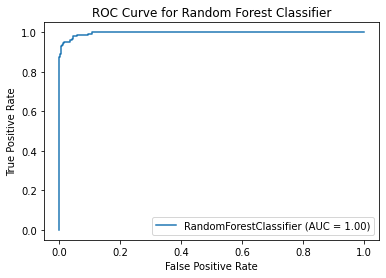

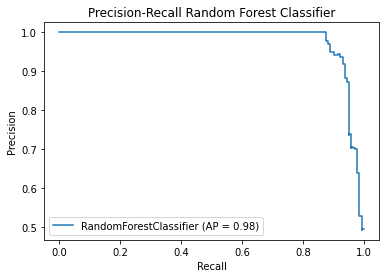

In [134]:
train_score = rfc.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = rfc.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rfc.predict(test_x)

precision_rf = precision_score(test_y, y_pred_rf, labels=class_name).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(test_y, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_roc_curve(rfc, test_x, test_y)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rfc, test_x, test_y)
plt.title('Precision-Recall Random Forest Classifier')

### **Decision Tree Classification**

In [138]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
y_pred=dtc.predict(test_x)

Training Accuracy: 1.0
Testing Accuracy: 0.98
Precision: 0.91
Recall: 0.89


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

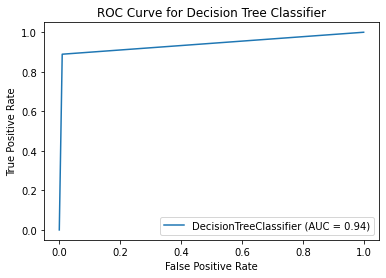

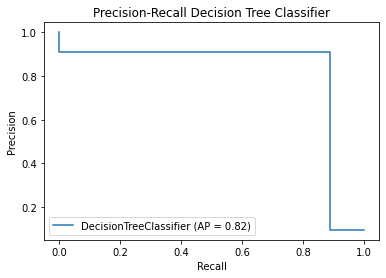

In [140]:
train_score = dtc.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = dtc.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_y, y_pred, labels=class_name).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_y, y_pred).round(2)
print('Recall:', recall_dt)

plot_roc_curve(dtc, test_x, test_y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(dtc, test_x, test_y)
plt.title('Precision-Recall Decision Tree Classifier')

### **Karnott Nearest Neighbour**

In [141]:
from sklearn.neighbors import KNeighborsClassifier
k= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')
k.fit(train_x,train_y)
y_pred=k.predict(test_x)

Training Accuracy: 0.93
Testing Accuracy: 0.92
Precision: 0.66
Recall: 0.35


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

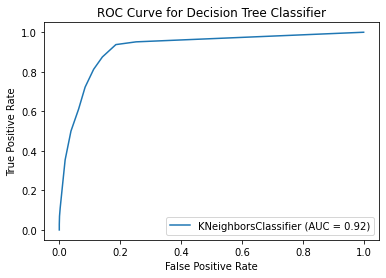

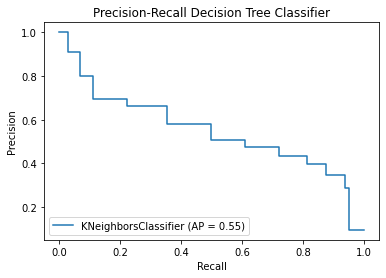

In [143]:
train_score = k.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = k.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_y, y_pred, labels=class_name).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_y, y_pred).round(2)
print('Recall:', recall_dt)

plot_roc_curve(k, test_x, test_y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(k, test_x, test_y)
plt.title('Precision-Recall Decision Tree Classifier')

#### **Accuracy:**
     
*   Logistic Regression  : 94.86%
*   Random Forest : 99%
*   Decision Trees : 99%
*   KNearest Neighbours  : 94.13%




### **STEP 9:**  Give a business understanding of your model.

*The main goal of the bank was to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans.*

*So, as per the bank's wish to convert the liability based customers to personal loan customers, (while retaining them as depositors) using the given dataset we worked on various machine learning models and did a lot of analysis.*

*After comparing the accuracy of each model, we came to a conclusion that decision trees and random forest model gave the highest accuracies.
So by training these models with bigger datasets, we can improve accuracy a little more and also can put it to a commercial use.*